<a href="https://colab.research.google.com/github/singaram-subramanyan/Bankruptcy_prediction/blob/main/Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bankruptcy Prediction
## Members: Manmohanbabu Rupanagudi, Singaram Subramanyan



In [ ]:
# install modules
%pip --quiet install opendatasets

In [ ]:
# import modules
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.utils import resample

In [ ]:
# Download the dataset
od.download("https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pandu0
Your Kaggle Key: ··········


100%|██████████| 4.47M/4.47M [00:00<00:00, 31.1MB/s]

In [ ]:
# load dataset
df = pd.read_csv("/content/american-companies-bankruptcy-prediction-dataset/american_bankruptcy.csv")
df = df.dropna()
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
# rename columns
df.rename(columns={
  "X1" : "Current assets",
  "X2" : "Cost of goods sold",
  "X3" : "Depreciation and amortization",
  "X4" : "EBITDA",
  "X5" : "Inventory",
  "X6" : "Net Income",
  "X7" : "Total Receivables",
  "X8" : "Market value",
  "X9" : "Net sales",
  "X10" : "Total assests",
  "X11" : "Total Long-term debt",
  "X12" : "EBIT",
  "X13" : "Gross Profit",
  "X14" : "Total Current Liabilities",
  "X15" : "Retained Earnings",
  "X16" : "Total Revenue",
  "X17" : "Total Liabilities",
  "X18" : "Total Operating Expenses"
}, inplace=True)
df.head()

,company_name,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,...,Net sales,Total assests,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
# encode the label variable (status_label)
labels = df.status_label.unique().tolist()
df.status_label = df['status_label'].map(lambda x: 0 if x == labels[0] else 1) # lables[0] is alive and labels[1] is failed

## Exploratory Data Analysis

### Linear correlation between the columns.

In [ ]:
# correlation
df_dropped = df.drop(columns=['company_name', 'status_label'])
df_dropped.corr().style.background_gradient(cmap="YlOrRd", subset=df_dropped.columns.to_list())

,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assests,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
year,1.000000,0.096764,0.065320,0.078040,0.082694,0.073918,0.063232,0.082141,0.080689,0.075471,0.100649,0.121160,0.077256,0.084388,0.085043,0.052765,0.075471,0.104300,0.070588
Current assets,0.096764,1.000000,0.660564,0.659173,0.812872,0.638698,0.657366,0.851945,0.826568,0.758712,0.824172,0.641522,0.806540,0.839140,0.903493,0.549777,0.758712,0.794479,0.713187
Cost of goods sold,0.065320,0.660564,1.000000,0.601328,0.674880,0.780846,0.517079,0.662863,0.556610,0.975963,0.681138,0.479374,0.646028,0.723855,0.784213,0.593223,0.975963,0.657386,0.988994
Depreciation and amortization,0.078040,0.659173,0.601328,1.000000,0.853222,0.426229,0.534297,0.696474,0.668160,0.700824,0.911330,0.781753,0.712093,0.796021,0.752106,0.588563,0.700824,0.877051,0.639004
EBITDA,0.082694,0.812872,0.674880,0.853222,1.000000,0.512667,0.766148,0.779820,0.859896,0.796124,0.916728,0.730642,0.973745,0.923711,0.835342,0.674287,0.796124,0.865836,0.719960
Inventory,0.073918,0.638698,0.780846,0.426229,0.512667,1.000000,0.395436,0.503019,0.483074,0.791135,0.553202,0.415740,0.504091,0.657215,0.719630,0.436993,0.791135,0.557678,0.808342
Net Income,0.063232,0.657366,0.517079,0.534297,0.766148,0.395436,1.000000,0.588943,0.714706,0.606444,0.646947,0.434078,0.798147,0.696554,0.637441,0.628653,0.606444,0.587707,0.547576
Total Receivables,0.082141,0.851945,0.662863,0.696474,0.779820,0.503019,0.588943,1.000000,0.684549,0.726521,0.806388,0.645599,0.745765,0.731790,0.872734,0.570250,0.726521,0.807136,0.682650
Market value,0.080689,0.826568,0.556610,0.668160,0.859896,0.483074,0.714706,0.684549,1.000000,0.685420,0.789200,0.576519,0.865917,0.853052,0.762850,0.629782,0.685420,0.712536,0.620050
Net sales,0.075471,0.758712,0.975963,0.700824,0.796124,0.791135,0.606444,0.726521,0.685420,1.000000,0.784902,0.581507,0.765814,0.856822,0.858866,0.635692,1.000000,0.754276,0.993149


A smaller heat map version of the above:

<Axes: >

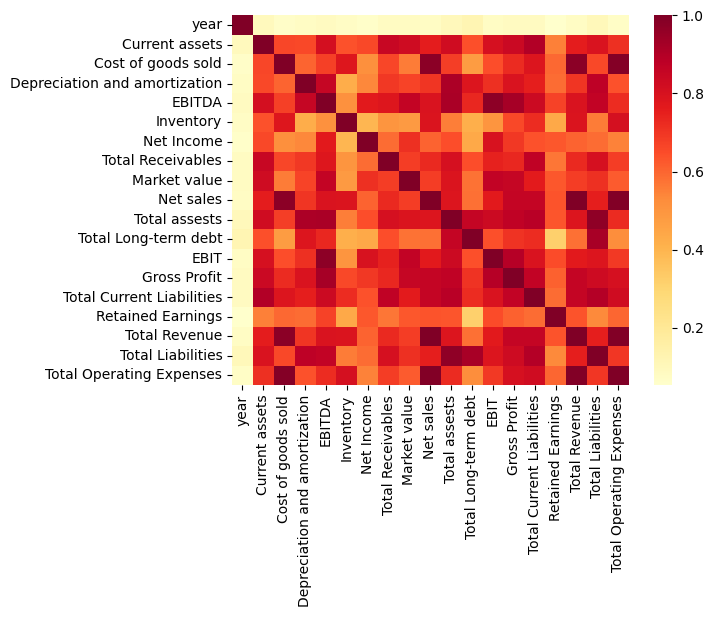

In [ ]:
# plt.figure(figsize=(13, 10))
sns.heatmap(
    data=df_dropped.corr(),
    cmap="YlOrRd",
    # annot=True,
    # fmt='.2f'
)


The above shows us the corelation between all the columns.

* As we can see the `Net Income` and `Retained Earnings` columns have a relatively low correlation.

* We can also see that the `Total Revenue` and `Net Sales` columns are perfectly correlated. Let's see why.

In [ ]:
df_dropped['Net sales'] - df_dropped['Total Revenue']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
78677    0.0
78678    0.0
78679    0.0
78680    0.0
78681    0.0
Length: 78682, dtype: float64

In [ ]:
(df_dropped['Net sales'] - df_dropped['Total Revenue']).unique().tolist()

[0.0]

* As we can see above when we subtract the values from both columns, we get `0` for all entries.
* This means that `Net Sales` and `Total Revenue` contain the same information.

### Check for outliers

In [ ]:
temp_df = df.drop(columns=['status_label', 'company_name', 'year'])
temp_df.describe().style.background_gradient(cmap="YlOrRd", subset=temp_df.columns.to_list())

,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assests,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3414.354610,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,18414.103647,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,0.000100,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,34.980000,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,227.511850,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1244.889950,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1073390.540000,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


* Above we can notice that there are potentially extreme **outliers** in each of the columns

#### Distribuition of the variables before scaling

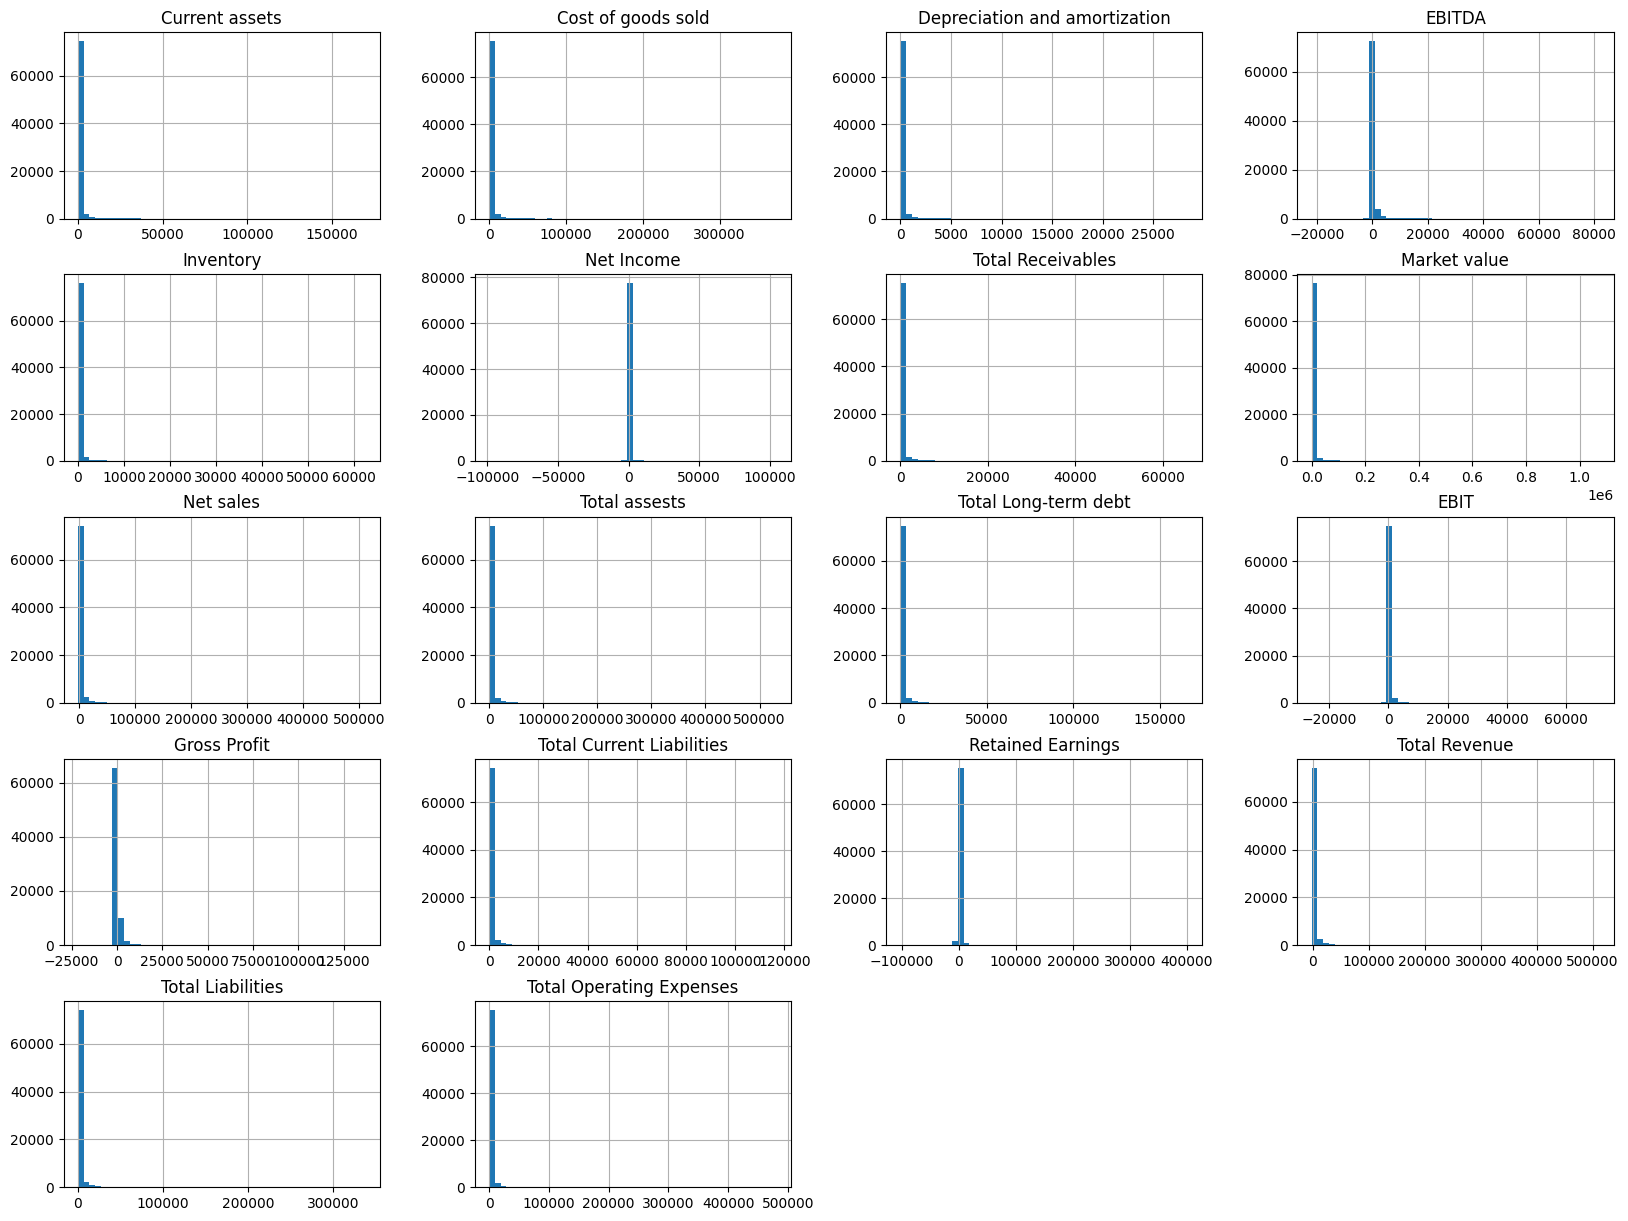

In [ ]:
temp_df = df.drop(columns=['status_label', 'company_name', 'year'])
temp_df.hist(bins=50, figsize=(20,15))
plt.show()

* We are unable to view the distribution due to the outliers being present far away from the majority of the dataset.

* We can fix this by **removing** data points that lie outside the `Interquartile Range (IQR)`

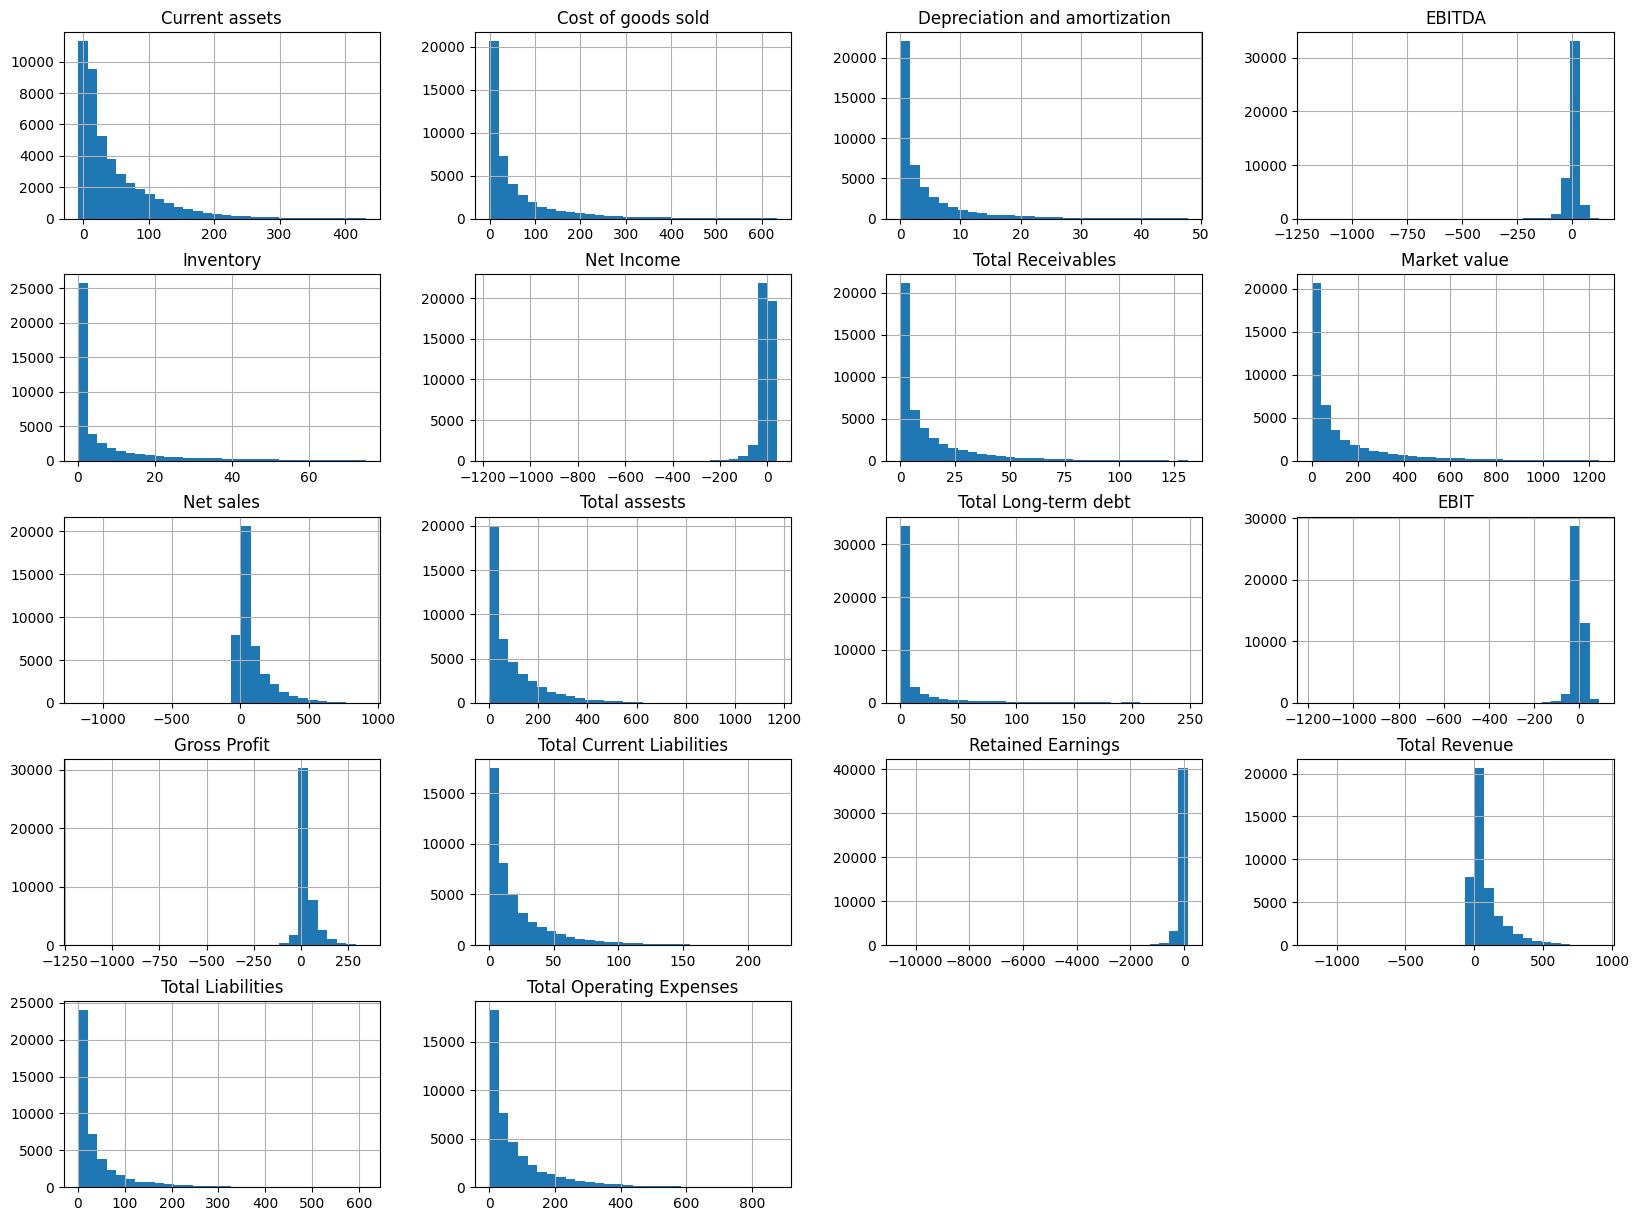

In [ ]:
cols = list()

for col in temp_df.columns.tolist():
  # calculate the interquartile range
  q1 = temp_df[col].quantile(0.25)
  q3 = temp_df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  # get rid of outliers
  temp_col = temp_df[(temp_df[col] > lower_bound) & (temp_df[col] < upper_bound)][col]
  temp_col = temp_df[col]
  temp_col = temp_col[temp_col < q3]
  cols.append(temp_col)

lens = list()

for col in cols:
  lens.append(col.shape[0])

min = pd.Series(lens).min()

same_length_cols = list()

for col in cols:
  same_length_cols.append(col.iloc[:min])

new_df = pd.DataFrame()

for col in same_length_cols:
  new_df[col.name] = col

new_df = new_df.dropna()
new_df.hist(bins=30, figsize=(20,15));

* Removing the outliers allowed us to view the distribuitions of the numerical columns more easily.

* It can be observed that most of the distributions are **skewed to the right**.
* So, we will **scale** them using a transformer to attain a **normal distribuition** becasue it helps the ML models learn better.

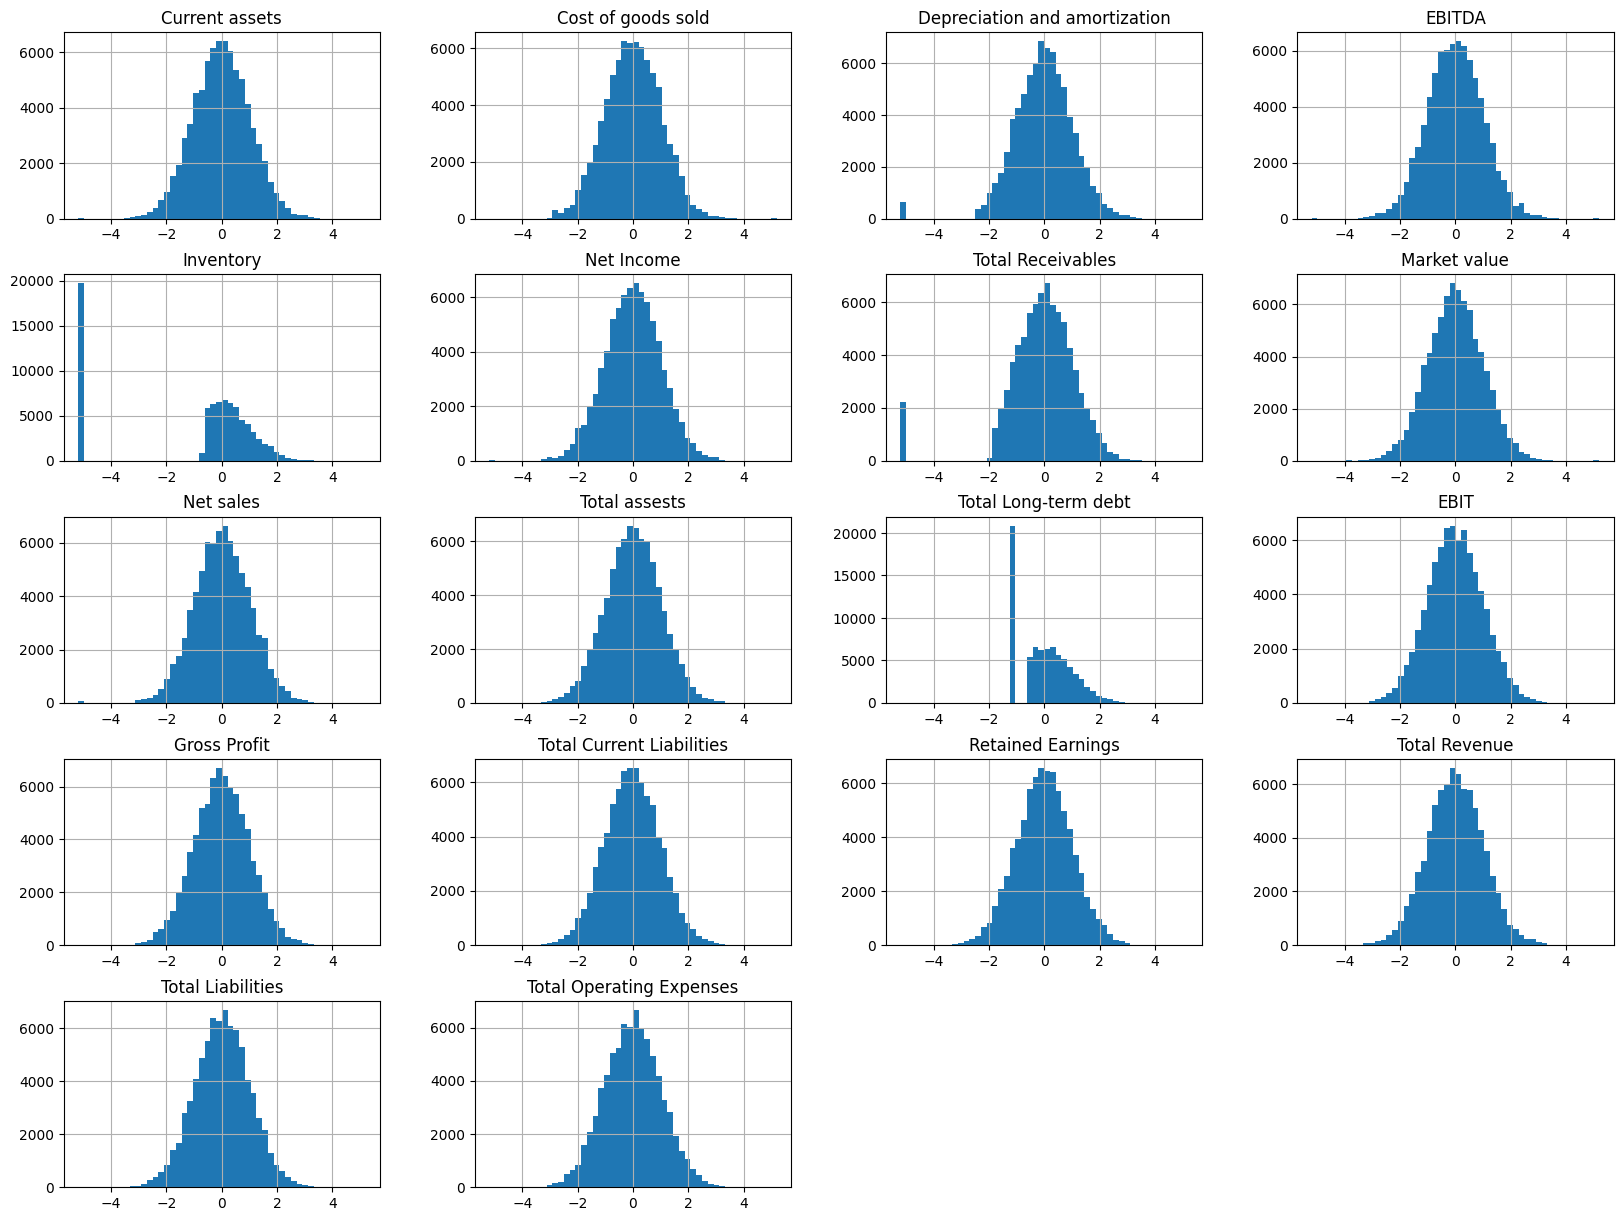

In [ ]:
# Initialize the QuantileTransformer with desired output distribution
qt = QuantileTransformer(output_distribution='normal');

# Fit and transform the data
df_transformed = pd.DataFrame(qt.fit_transform(temp_df), columns=temp_df.columns);

df_transformed.hist(bins=50, figsize=(20,15));


This histogram looks much better, but two of the plots, `Inventory` and `Total Long-term debt` don't look right. Lets investigate why.



In [ ]:
df.Inventory.describe()

count    78682.000000
mean       201.605717
std       1060.766096
min          0.000000
25%          0.000000
50%          7.023000
75%         74.747250
max      62567.000000
Name: Inventory, dtype: float64

In [ ]:
# First and Third quartiles
q1 = df.Inventory.quantile(0.25)
q3 = df.Inventory.quantile(0.75)
# IQR
iqr = q3 - q1
# upper and lower bounds to detect outliers
low = q1 - (1.5 * iqr)
high = q3 + (1.5 * iqr)

In [ ]:
print("lower outliers:", len(df.Inventory[df.Inventory < low]), " upper outliers:", len(df.Inventory[df.Inventory > high]),)

lower outliers: 0  upper outliers: 12435


In [ ]:
print(f"Datapoints that are extreme outliers in Inventory: \n{((len(df.Inventory[df.Inventory > high])/len(df.Inventory)) * 100):.2f}%")

Datapoints that are extreme outliers in Inventory: 
15.80%


The the `statistics` above shows us that the `Inventory` column has a large amount of **extreme** outliers, resulting in the QuantileTransformer being unable to normalize the data.

In [ ]:
df['Total Long-term debt'].describe()

count     78682.000000
mean        722.483710
std        3242.170946
min          -0.023000
25%           0.000000
50%           7.593500
75%         248.760750
max      166250.000000
Name: Total Long-term debt, dtype: float64

In [ ]:
# First and Third quartiles
q1 = df['Total Long-term debt'].quantile(0.25)
q3 = df['Total Long-term debt'].quantile(0.75)
# IQR
iqr = q3 - q1
# upper and lower bounds to detect outliers
low = q1 - (1.5 * iqr)
high = q3 + (1.5 * iqr)

In [ ]:
print("lower outliers:",
      len(df['Total Long-term debt'][df['Total Long-term debt'] < low]),
      " upper outliers:",
      len(df['Total Long-term debt'][df['Total Long-term debt'] > high]))

lower outliers: 0  upper outliers: 12641


In [ ]:
percent_of_upper_extreme_outliers = ((len(df['Total Long-term debt'][df['Total Long-term debt'] > high])/len(df['Total Long-term debt'])) * 100)

print(f"Datapoints that are extreme outliers in Inventory: \n{percent_of_upper_extreme_outliers:.2f}%")

Datapoints that are extreme outliers in Inventory: 
16.07%


* Similar to the Inventory column, the `statistics` above shows us that the `Total Long-term debt` column has a large amount of **extreme** outliers.

* Hence, we will **drop** these two columns from our dataset when training to **improve** our model performance.

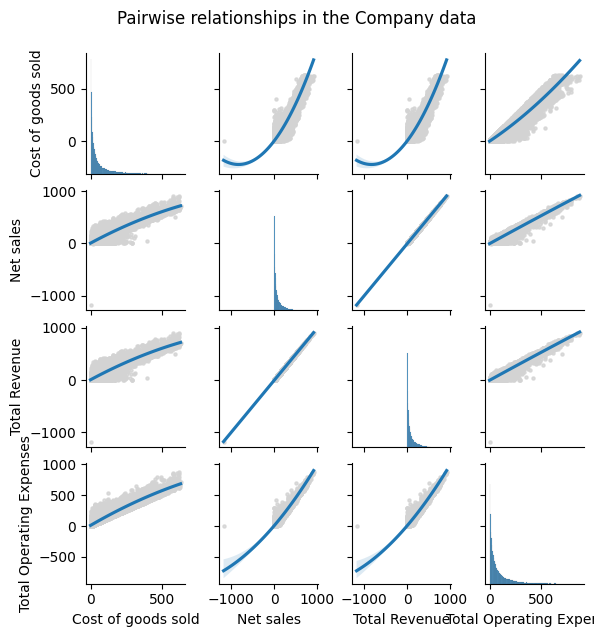

In [ ]:
sns.pairplot(
    data=new_df[['Cost of goods sold', 'Net sales', 'Total Revenue', 'Total Operating Expenses']],
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5 # make the individual plots small,
);
plt.suptitle(
    "Pairwise relationships in the Company data", y=1.05
);

The pairwise plot shows the graphical representation of the relationship between some of the columns.

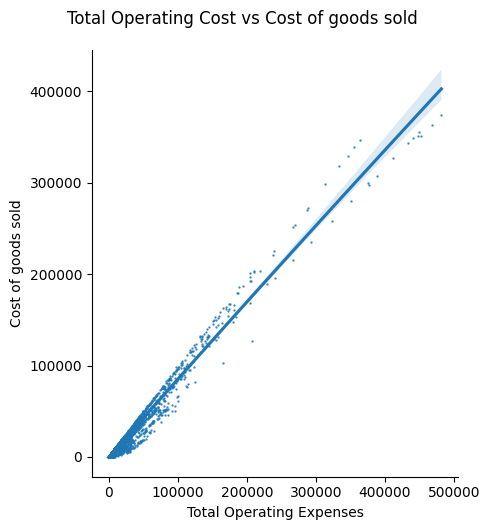

In [ ]:
sns.lmplot(
    data=df,
    x='Total Operating Expenses',
    y='Cost of goods sold',
    order=2,
    markers='.',
    scatter_kws={"s":2}
);
plt.suptitle(
    "Total Operating Cost vs Cost of goods sold ", y=1.05
);

Lets take a closer look at the relationship between `Total Operating Expenses` and `Cost of goods sold`. The above graph shows that they have a linear relationship.

## Machine Learning

Now, let's move onto to machine learning.

First, based on our analysis, let's remove columns that may hinder the performance of the model.

In [ ]:
# Dropping columns such as Inventory and Total Long-term debt due to extreme outliers even after transforming the data using a Qunatile Transformer
# Dropping columns such as Net Income and Retained Earnings due to the relatively low correlation
# Dropping company_name as the company_name is not relavent
# Dropping Net sales as it is the same as the Total Revenue column
x = df.drop(columns=['company_name', 'year','status_label', 'Inventory', 'Total Long-term debt', 'Net Income', 'Retained Earnings','Net sales' ])

y = df['status_label']

Now, let's first try training a model using the Logistic Regression algorithm.

### Logistic Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42) # Creating test and train datasets

pipe = Pipeline([ # Pipeline with Logistic Regression Model and Standard Scaler
        ("Scaler", StandardScaler()),
        ("Model",LogisticRegression())
    ])

pipe.fit(x_train, y_train)
c_report = classification_report(y_test, pipe.predict(x_test), output_dict=True)
report_df = pd.DataFrame(c_report).transpose().iloc[:3, :3]
print(f'Logistic Regression Report:', report_df, sep='\n')

Logistic Regression Report:
          precision    recall  f1-score
0          0.932350  0.999659  0.964832
1          0.444444  0.003745  0.007428
accuracy   0.932071  0.932071  0.932071


The above scores of Logistic Regression looks to be really good for `alive (0)` and `accuracy` in general. However, the scores for `failed(1)` are terribly low. Let's try a different Machine Learning Algorithm to see if we can get a higher score.


### KNeighborsClassifier:

In [ ]:
pipe = Pipeline([ # Pipeline with Quantile Transformer and implementing gridsearch on K Neighbors Classifier Model
    ("StandardScaler", QuantileTransformer()),
    ("KNN", GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid={'n_neighbors': [3,5,7,9],
                    'weights': ['distance', 'uniform']
        },
        scoring='f1',
        cv=3
    ))
])
pipe.fit(x_train, y_train)
c_report = classification_report(y_test, pipe.predict(x_test), output_dict=True)
report_df = pd.DataFrame(c_report).transpose().iloc[:3, :3]
print(f'KNN Report:', report_df, sep='\n')

KNN Report:
          precision    recall  f1-score
0          0.948423  0.984048  0.965907
1          0.547389  0.264981  0.357098
accuracy   0.935248  0.935248  0.935248


Even though the scores are better for `failed (1)`, the scores are still low. Lets try one more algorithm to see if this can be improved.

### RandomForestClassifier

In [ ]:
pipe = Pipeline([ # Pipeline with Quantile Transformer and implementing gridsearch on Random Forest Classifier Model
    ("StandardScaler", QuantileTransformer()),
    ("RFClassifier", GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            "class_weight" : ['balanced'],
            'criterion': ['gini','entropy','log_loss'],
            'max_features': ['log2', 'sqrt']
        },
        scoring='f1',
        cv=3
    ))
])

pipe.fit(x_train, y_train)
c_report = classification_report(y_test, pipe.predict(x_test), output_dict=True)
report_df = pd.DataFrame(c_report).transpose().iloc[:3, :3]
print(f'RF Report:', report_df, sep='\n')

RF Report:
          precision    recall  f1-score
0          0.935216  0.999864  0.966460
1          0.962963  0.048689  0.092692
accuracy   0.935312  0.935312  0.935312


Even though the `precision` score for `failed (1)` is a lot better, the `recall` and `f1` scores are pretty low with the Random Forest Classifier. Let's take a closer look into our data, to see what the problem might be.

In [ ]:
df.status_label.value_counts()

status_label
0    73462
1     5220
Name: count, dtype: int64

As shown above, the lables (`alive` : `0`, `failed` : `1`) are heavily imbalanced. Let's try to fix this through Random Oversampling.



### Random Oversampling

In [ ]:
r = RandomOverSampler(random_state=42) # intialize RandomOverSampler
x_r_train, y_r_train = r.fit_resample(x_train,y_train) # Creating new training datasets using the RandomOverSampler

In [ ]:
pipe = Pipeline([ #Pipeline with Logistic Regression Model and Standard Scaler
        ("Scaler", StandardScaler()),
        ("Model",LogisticRegression())
    ])

pipe.fit(x_r_train, y_r_train)
c_report = classification_report(y_test, pipe.predict(x_test), output_dict=True)
report_df = pd.DataFrame(c_report).transpose().iloc[:3, :3]
print(f'Logistic Regression Report:', report_df, sep='\n')

Logistic Regression Report:
          precision    recall  f1-score
0          0.958835  0.547822  0.697267
1          0.098287  0.676966  0.171652
accuracy   0.556586  0.556586  0.556586


The Logistic Regression scores for `failed (1)` are better than before, but are still low. Let's try the transformed data with K Neighbors Classifier and Random Forest Classifier.

In [ ]:
pipe = Pipeline([ #Pipeline with Quantile Transformer and implementing gridsearch on K Neighbors Classifier Model
    ("StandardScaler", QuantileTransformer()),
    ("KNN", GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid={'n_neighbors': [3,5,7,9],
                    'weights': ['distance', 'uniform']
        },
        scoring='f1',
        cv=3
    ))
])

pipe.fit(x_r_train, y_r_train)
c_report = classification_report(y_test, pipe.predict(x_test), output_dict=True)
report_df = pd.DataFrame(c_report).transpose().iloc[:3, :3]
print(f'KNN Report:', report_df, sep='\n')
KNN_final_predictor_model = pipe

KNN Report:
          precision    recall  f1-score
0          0.963976  0.923035  0.943061
1          0.332348  0.526217  0.407394
accuracy   0.896105  0.896105  0.896105


Similar to Logistic Regression, the K Neighbor Classifier scores have improved but not exactly there yet.

In [ ]:
pipe = Pipeline([ #Pipeline with Quantile Transformer and implementing gridsearch on Random Forest Classifier Model
    ("StandardScaler", QuantileTransformer()),
    ("RFClassifier", GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'criterion': ['gini','entropy','log_loss'],
            'warm_start': [True,False],
            'max_features': ['log2', 'sqrt']
        },
        scoring='f1',
        refit='f1',
        cv=3
    ))
])

pipe.fit(x_r_train, y_r_train)
c_report = classification_report(y_test, pipe.predict(x_test), output_dict=True)
report_df = pd.DataFrame(c_report).transpose().iloc[:3, :3]
print(f'RF Report:', report_df, sep='\n')

Similar to Logistic Regression and K Neighbors Classifier, the scores for `failed (1)` have improved for Random Forest Classifier with Random Oversampling. However, the score is still low. Let's try a different sampling method to see if that might handle the imbalanced data better.

### Resampling

In [ ]:
# split dataframe into disjoint train and test dataframes, we do this to avoid sampling bias
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)

y_majority = train_df[train_df['status_label'] == 0]
y_minority = train_df[train_df['status_label'] == 1]

# upsample minority class
y_minority_upsampled = resample(
    y_minority, # sample used to populate
    replace=True, # sampling with replacement
    n_samples=int(len(df) * 0.33), # number of samples
    random_state=42 # for reproducibility
)

# Combine majority class with upsampled minority class
train_df = pd.concat([y_minority_upsampled, y_majority])

In [ ]:
# drop columns we determined unnecessary
train_df.drop(columns=['company_name', 'year', 'Inventory', 'Total Long-term debt', 'Net sales', 'Retained Earnings', 'Net Income'], inplace=True)
test_df.drop(columns=['company_name', 'year', 'Inventory', 'Total Long-term debt', 'Net sales', 'Retained Earnings', 'Net Income'], inplace=True)

# train and test sets
X_tr = train_df.drop('status_label', axis=1)
y_tr = train_df['status_label']
X_te = test_df.drop('status_label', axis=1)
y_te = test_df['status_label']

In [ ]:
# models to train
models = [
    ("Logistic", LogisticRegression(solver='liblinear')),
    ("KNN", GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid={
            "n_neighbors" : [3, 5, 7, 9],
            'weights': ['distance', 'uniform']
        },
        scoring="f1",
        refit=True,
        n_jobs=3
    )),
    ("RF", GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'criterion': ['entropy','log_loss'],
            'max_features': ['log2', 'sqrt'],
            'class_weight': ['balanced']
        },
        scoring="f1",
        refit=True,
        n_jobs=3
    ))
]

#### Training and Results

In [ ]:
for name, model in models:
    pipe = Pipeline([
        ("Scaler", StandardScaler()),
        ("Model", model)
    ])

    pipe.fit(X_tr, y_tr)

    c_report = classification_report(y_te, pipe.predict(X_te), output_dict=True)

    report_df = pd.DataFrame(c_report).transpose().iloc[:3, :3]

    # best_params = pd.DataFrame(pipe.get_params())

    print(f'{name} Report:', report_df, sep='\n', end='\n\n')


Logistic Report:
          precision    recall  f1-score
0          0.932880  0.993177  0.962085
1          0.253394  0.031390  0.055860
accuracy   0.927097  0.927097  0.927097

KNN Report:
          precision    recall  f1-score
0          0.961255  0.926433  0.943523
1          0.331203  0.493834  0.396490
accuracy   0.896711  0.896711  0.896711

RF Report:
          precision    recall  f1-score
0          0.938947  0.997850  0.967503
1          0.805243  0.120516  0.209654
accuracy   0.937572  0.937572  0.937572



* Above we can see that that KNN has the overall best perfomance.
* We can still notice that `recall` for `failed (1)` is still **low** across all models.
* This is due to the imbalance in the dataset. Resampling can only do so much since all it does is add duplicates of rows with a `failed (1)` label to counterbalance.

### Conclusion

Overall, we were able to get some of the scores up for `failed (1)` by trying different Machine Learning Algorithms and different sampling techniques to handle the **imbalance** in the dataset. However, due to the degree of imbalance in the data, the sampling techniques only helped to a certain extent. This left the recall scores low for `failed (1)` across all the models.

On the other hand, the scores for `alive(0)` **remained** fairly high.

### Demonstration

A sample prediction is shown below:

In [ ]:
sample_row = x_test.tail(1)
sample_row

,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Total Receivables,Market value,Total assests,EBIT,Gross Profit,Total Current Liabilities,Total Revenue,Total Liabilities,Total Operating Expenses
14018,11542.0,7990.0,3591.0,14168.0,5395.0,75991.5433,60044.0,10577.0,15949.0,7947.0,23939.0,22424.0,9771.0


In [ ]:
sample_row_true = y_test.iloc[-1]
prediction = KNN_final_predictor_model.predict(sample_row)[0]
print(f"Expected: {sample_row_true}\nActual: {prediction}")

Expected: 0
Actual: 0


### References

https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py